## Importing required modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

## Getting the required data

In [4]:
dataset = pd.read_csv("dataset.csv", index_col=False)
dataset.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Preprocessing the data

In [5]:
#splitting the dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], 
                                                    dataset.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [6]:
#checking the total number of examples in training set
len(x_train)

4213

In [7]:
#removing the index column as it is of no use
x_train = x_train.iloc[:, 1:]
x_test = x_test.iloc[:, 1:]

In [8]:
#getting the company name by splitting it from the name column
make_train = x_train["Name"].str.split(" ", expand = True)
make_test = x_test["Name"].str.split(" ", expand = True)

In [9]:
x_train["Company"] = make_train[0]
x_test["Company"] = make_test[0]
#dropping the name column 
x_train.drop("Name", axis = 1, inplace = True)
x_test.drop("Name", axis = 1, inplace = True)

Text(0, 0.5, 'Count of cars')

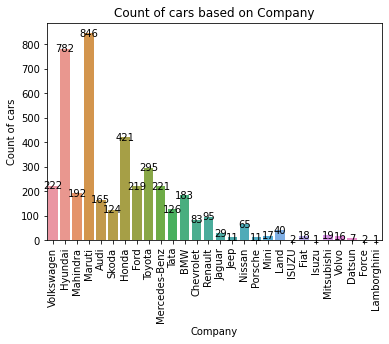

In [10]:
#plotting the data from the dataframe and counting the cars based on the company
import seaborn as sns
plot = sns.countplot(x = 'Company', data = x_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center')

plt.title("Count of cars based on Company")
plt.xlabel("Company")
plt.ylabel("Count of cars")

In [11]:
#This column defines the mileage of the car. We need to extract the numerical value out of each string and save it.
mileage_train = x_train["Mileage"].str.split(" ", expand = True)
mileage_test = x_test["Mileage"].str.split(" ", expand = True)

x_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
x_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')

In [12]:
#checking if there are any null values
print(sum(x_train["Mileage"].isnull()))
print(sum(x_test["Mileage"].isnull()))

1
1


In [13]:
#replace the missing value with the mean value of the column based on the training data.
x_train["Mileage"].fillna(x_train["Mileage"].astype("float64").mean(), inplace = True)
x_test["Mileage"].fillna(x_train["Mileage"].astype("float64").mean(), inplace = True)

In [14]:
#Location should not be a determinant for the price of a car and I'll safely remove it.
x_train.drop("Location", axis = 1, inplace = True)
x_test.drop("Location", axis = 1, inplace = True)

In [15]:
#seperating the numeric values from the string type from the following columns
cc_train = x_train["Engine"].str.split(" ", expand = True)
cc_test = x_test["Engine"].str.split(" ", expand = True)
x_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
x_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

bhp_train = x_train["Power"].str.split(" ", expand = True)
bhp_test = x_test["Power"].str.split(" ", expand = True)
x_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
x_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')


In [16]:
#missing values in Engine, Power and Seats, I'll again replace them with the mean.
x_train["Engine"].fillna(x_train["Engine"].astype("float64").mean(), inplace = True)
x_test["Engine"].fillna(x_train["Engine"].astype("float64").mean(), inplace = True)

x_train["Power"].fillna(x_train["Power"].astype("float64").mean(), inplace = True)
x_test["Power"].fillna(x_train["Power"].astype("float64").mean(), inplace = True)

x_train["Seats"].fillna(x_train["Seats"].astype("float64").mean(), inplace = True)
x_test["Seats"].fillna(x_train["Seats"].astype("float64").mean(), inplace = True)

In [17]:
#Lets drop the new price column as we wont be using it
x_train.drop(["New_Price"], axis = 1, inplace = True)
x_test.drop(["New_Price"], axis = 1, inplace = True)

In [18]:
#let's create dummy columns for categorical columns before we begin training.
x_train = pd.get_dummies(x_train,
                         columns = ["Company", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

x_test = pd.get_dummies(x_test,
                         columns = ["Company", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [19]:
#replacing missing data with 0
missing_cols = set(x_train.columns) - set(x_test.columns)
for col in missing_cols:
    x_test[col] = 0
x_test = x_test[x_train.columns]

In [20]:
#now that we are done with data processing lets scale it.
standardScaler = StandardScaler()
standardScaler.fit(x_train)
x_train = standardScaler.transform(x_train)
x_test = standardScaler.transform(x_test)

## Training the data

In [21]:
linearRegression = LinearRegression()
linearRegression.fit(x_train, y_train)

LinearRegression()

## Predicting the data

In [22]:
y_pred = linearRegression.predict(x_test)
r2_score(y_test, y_pred)

0.7008908549416734